In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [183]:
shopnow = pd.read_csv("shopnow.csv")
shopnow.sample(10)

,Transaction ID,Transaction Amount,Transaction Time,Status,Bank Name,Card Network,Error Response,Payment Channel,Customer ID,Currency,country_name
72179,139961831,2200.0,09/11/2021 17:54,abandoned,unknown,unknown,the transaction was not completed,card,30106132,ngn,unknown
247656,330902297,2050.0,18/02/2022 07:40,success,Orange Bank,mastercard,approved,card,31570987,ngn,Nigeria
174565,245865829,3500.0,05/01/2022 05:50,success,Pole Bank,visa,approved,card,15631671,ngn,Nigeria
35556,98080197,1800.0,20/10/2021 14:41,abandoned,unknown,unknown,the transaction was not completed,card,29466586,ngn,unknown
39776,103046141,1500.0,22/10/2021 22:37,success,Red Bank,mastercard,approved,card,25555050,ngn,Nigeria
51597,117160111,5550.0,29/10/2021 18:10,abandoned,unknown,unknown,the transaction was not completed,card,20754602,ngn,unknown
289561,388554722,2050.0,16/03/2022 05:28,abandoned,unknown,unknown,the transaction was not completed,card,34163818,ngn,unknown
109389,178934626,3550.0,30/11/2021 17:56,abandoned,unknown,unknown,the transaction was not completed,card,9613111,ngn,unknown
135457,206614342,1750.0,14/12/2021 12:52,abandoned,unknown,unknown,the transaction was not completed,card,30705172,ngn,unknown
215450,290610900,2050.0,28/01/2022 20:48,abandoned,unknown,unknown,the transaction was not completed,card,25566114,ngn,unknown


In [40]:
# find q2 revenue 
# create new columns for year and month for further analysis
shopnow['year'] = pd.DatetimeIndex(shopnow['Transaction Time']).year
shopnow['month'] = pd.to_datetime(shopnow['Transaction Time'], format="%d/%m/%Y %H:%M").dt.month
shopnow['month_name'] = pd.to_datetime(shopnow['Transaction Time'], format="%d/%m/%Y %H:%M").dt.month_name()
shopnow['day_name'] = pd.to_datetime(shopnow['Transaction Time'], format="%d/%m/%Y %H:%M").dt.day_name()


In [116]:
colors = ['#0070C0', '#011B33', '#5D8BF4', '#FFBCBC',  '#DFF6FF', '#F38BA0'] 

Total Possible Revenue:  972969526.5
Q4_21 Possible Revenue:  504419748.0
Q1_22 Possible Revenue:  468549778.5


Text(0, 0.5, 'Transaction Amount')

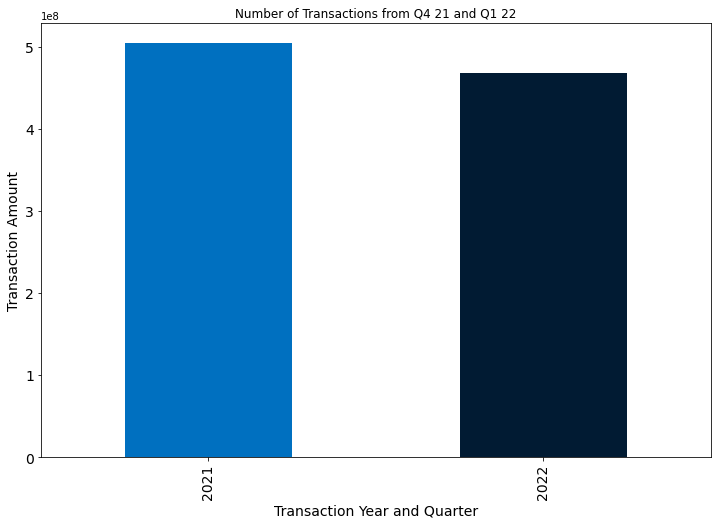

In [63]:
# quarterly comparison all transactions
quarters_revenue = shopnow.groupby(['year'])['Transaction Amount'].sum()
total_revenue = quarters_revenue.sum()
Q4_21_revenue = quarters_revenue.iloc[0]
Q1_22_revenue = quarters_revenue.iloc[1]

print("Total Possible Revenue: ", total_revenue)
print("Q4_21 Possible Revenue: ", Q4_21_revenue)
print("Q1_22 Possible Revenue: ", Q1_22_revenue)
TR_Plot = quarters_revenue.plot(kind='bar', title='Number of Transactions from Q4 21 and Q1 22', color=colors,  figsize = (12, 8),  fontsize=14)
TR_Plot.set_xlabel("Transaction Year and Quarter", fontsize=14)
TR_Plot.set_ylabel("Transaction Amount", fontsize=14)

year
2021    166790
2022    147628
Name: Transaction ID, dtype: int64
Total Transaction:  314418
Q4_21 Transaction:  166790
Q1_22 Transaction:  147628
Status     year
success    2021    170003833.0
abandoned  2021    286960990.0
failed     2021     47005115.0
reversed   2021       449810.0
abandoned  2022    279773987.0
success    2022    147591789.5
failed     2022     40823280.0
reversed   2022       360722.0
Name: Transaction Amount, dtype: float64
The number of abandoned transaction in both quarters were very high. Shop Now needs to encourage the completion of transactions through methods such as (follow-up calls, push notifications, and targeted ads of abandoned products)


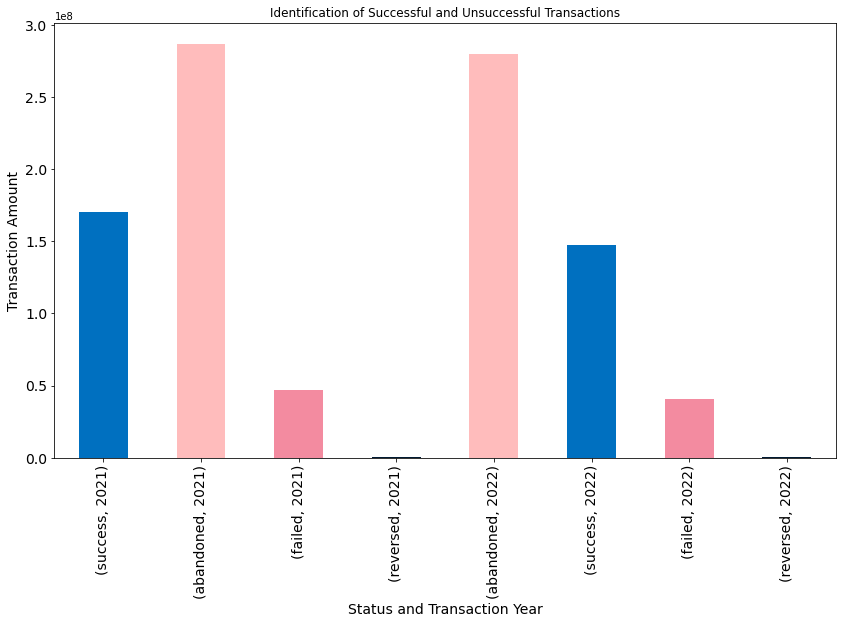

In [ ]:
# transactions that worked 
quarterly_revenue_worked = shopnow.groupby(['Status', 'year'], sort=False)['Transaction Amount'].sum()
print(quarterly_revenue_worked)
quarterly_revenue_worked.to_csv (r'.\quarterly_revenue_worked.csv')
colors1 = ['#0070C0', '#FFBCBC', '#F38BA0', '#011B33', '#FFBCBC', '#0070C0',  '#F38BA0','#011B33',]
QR_Plot = quarterly_revenue_worked.plot(kind='bar' ,title='Identification of Successful and Unsuccessful Transactions', color=colors1, figsize = (14, 8), fontsize=14)
QR_Plot.set_xlabel("Status and Transaction Year", fontsize=14)
QR_Plot.set_ylabel("Transaction Amount", fontsize=14)

print("The number of abandoned transaction in both quarters were very high. Shop Now needs to encourage the completion of transactions through methods such as (follow-up calls, push notifications, and targeted ads of abandoned products)")

year
2021    166790
2022    147628
Name: Transaction ID, dtype: int64
Total Transaction:  314418
Q4_21 Transaction:  166790
Q1_22 Transaction:  147628


Text(0, 0.5, 'Transaction Amount')

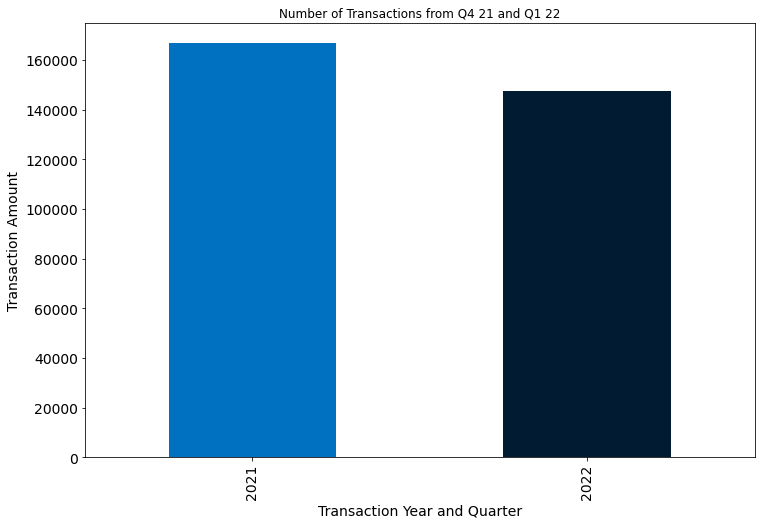

In [64]:
# count of transactions
quarters_transactions = shopnow.groupby(['year'])['Transaction ID'].count()
print(quarters_transactions)
total_transactions = quarters_transactions.sum()
Q4_21_transactions = quarters_transactions.iloc[0]
Q1_22_transactions = quarters_transactions.iloc[1]

print("Total Transaction: ", total_transactions)
print("Q4_21 Transaction: ", Q4_21_transactions)
print("Q1_22 Transaction: ", Q1_22_transactions)
TR_Plot = quarters_transactions.plot(kind='bar', title='Number of Transactions from Q4 21 and Q1 22', color=colors,  figsize = (12, 8),  fontsize=14)
TR_Plot.set_xlabel("Transaction Year and Quarter", fontsize=14)
TR_Plot.set_ylabel("Transaction Number", fontsize=14)

year
2021    166790
2022    147628
Name: Transaction ID, dtype: int64
Total Transaction:  314418
Q4_21 Transaction:  166790
Q1_22 Transaction:  147628
Status     year
success    2021    170003833.0
abandoned  2021    286960990.0
failed     2021     47005115.0
reversed   2021       449810.0
abandoned  2022    279773987.0
success    2022    147591789.5
failed     2022     40823280.0
reversed   2022       360722.0
Name: Transaction Amount, dtype: float64
The number of abandoned transaction in both quarters were very high. Shop Now needs to encourage the completion of transactions through methods such as (follow-up calls, push notifications, and targeted ads of abandoned products)


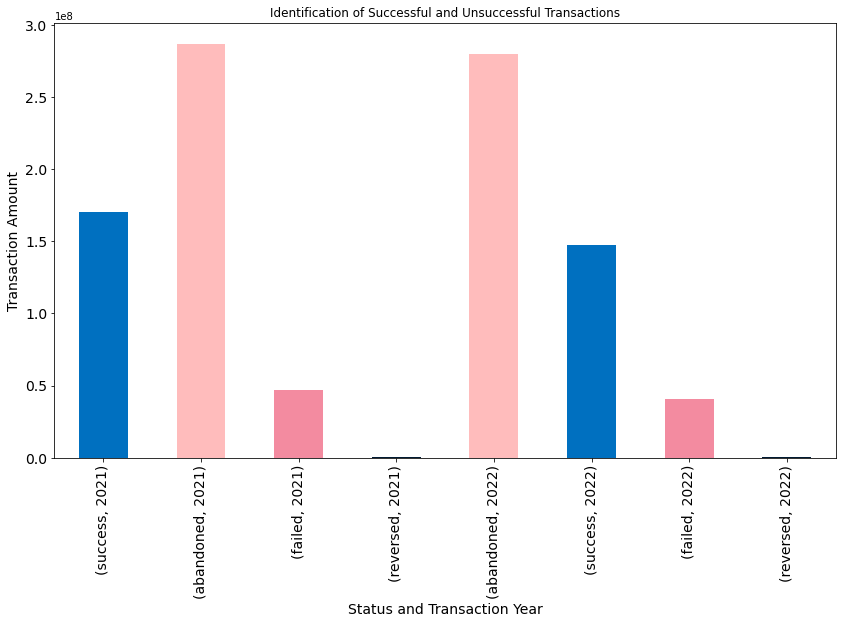

In [79]:
# transactions that worked 
quarterly_revenue_worked = shopnow.groupby(['Status', 'year'], sort=False)['Transaction Amount'].sum()
print(quarterly_revenue_worked)
quarterly_revenue_worked.to_csv (r'.\quarterly_revenue_worked.csv')
colors1 = ['#0070C0', '#FFBCBC', '#F38BA0', '#011B33', '#FFBCBC', '#0070C0',  '#F38BA0','#011B33',]
QR_Plot = quarterly_revenue_worked.plot(kind='bar' ,title='Identification of Successful and Unsuccessful Transactions', color=colors1, figsize = (14, 8), fontsize=14)
QR_Plot.set_xlabel("Status and Transaction Year", fontsize=14)
QR_Plot.set_ylabel("Transaction Amount", fontsize=14)

print("The number of abandoned transaction in both quarters were very high. Shop Now needs to encourage the completion of transactions through methods such as (follow-up calls, push notifications, and targeted ads of abandoned products)")

year
2021    286960990.0
2022    279773987.0
Name: Transaction Amount, dtype: float64
The mean of abandoned transactions is:  283367488.5
Total abandonedf Transaction:  566734977.0
Q4_21 abandonedf Transaction:  286960990.0
Q1_22 abandonedf Transaction:  279773987.0


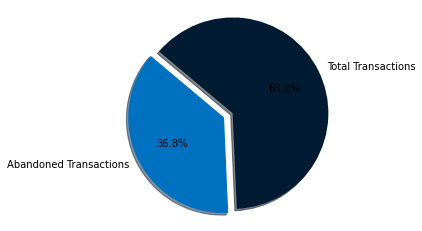

In [187]:
quarterly_revenue_worked
abandoned_transactions = quarterly_revenue_worked.loc['abandoned']
print(abandoned_transactions)
abandoned_transactions.head()
mean_abandoned_transactions = abandoned_transactions.mean()
print("The mean of abandoned transactions is: ", mean_abandoned_transactions)
sum_abandoned_transactions = abandoned_transactions.sum()

print("Total abandonedf Transaction: ", sum_abandoned_transactions)
print("Q4_21 abandonedf Transaction: ", abandoned_transactions.iloc[0])
print("Q1_22 abandonedf Transaction: ", abandoned_transactions.iloc[1])

# a plot of all the abandoned transactions
labels = [ 'Abandoned Transactions','Total Transactions']
sizes = [sum_abandoned_transactions, total_revenue]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

year
2021    170003833.0
2022    147591789.5
Name: Transaction Amount, dtype: float64
Total Successful Transaction:  317595622.5
Q4_21 Successful Transaction:  170003833.0
Q1_22 Successful Transaction:  147591789.5


<AxesSubplot:title={'center':'Comparison of Quarterly Revenue from Successful Transactions'}, xlabel='year'>

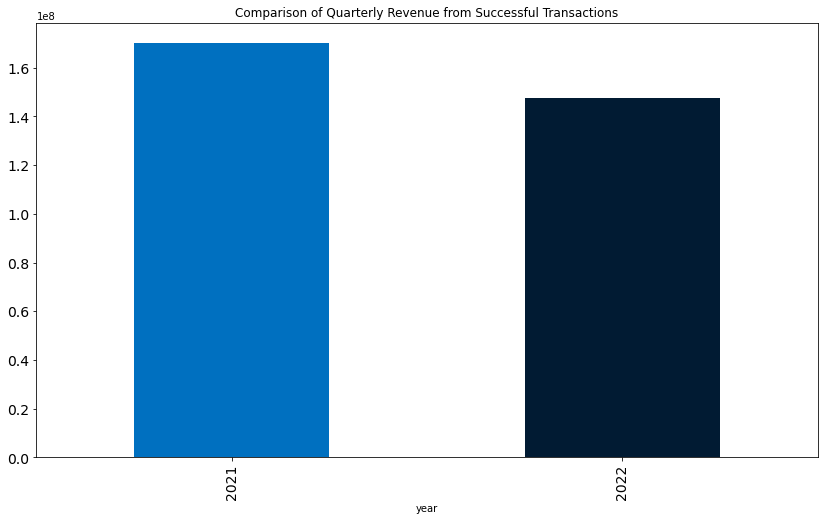

In [72]:
quarterly_revenue_worked
success_transactions = quarterly_revenue_worked.loc['success']
print(success_transactions)
success_transactions.head()
sum_success_transactions = success_transactions.sum()

print("Total Successful Transaction: ", sum_success_transactions)
print("Q4_21 Successful Transaction: ", success_transactions.iloc[0])
print("Q1_22 Successful Transaction: ", success_transactions.iloc[1])

# a plot of all the success transactions
success_transactions.plot(kind='bar', color=colors, title='Comparison of Quarterly Revenue from Successful Transactions',  figsize = (14, 8),  fontsize=14)



Count of successful transactions 103239
Count of unsuccessful transactions 211179


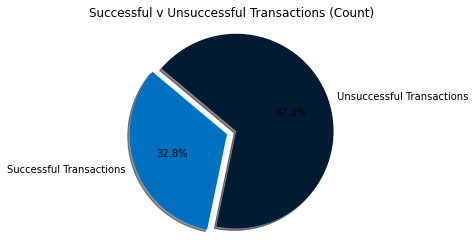

In [73]:
# successful transactions to be used in further analysis
successful_transactions_table = shopnow.loc[shopnow['Status'] == 'success']
successful_transactions_table.sample(20)

# all unsuccessful transactions
unsuccessful_transactions_table = shopnow.loc[shopnow['Status'] != 'success' ]
unsuccessful_transactions_table.sample(20)

# count of successful transactions
count_success_transactions = successful_transactions_table['Status'].count()
print('Count of successful transactions', count_success_transactions)

# count of unsuccessful transactions
count_unsuccess_transactions = unsuccessful_transactions_table['Status'].count()
print('Count of unsuccessful transactions', count_unsuccess_transactions)

# pie chart of successful and unsuccessful transactions using matplotlib
labels = ['Successful Transactions', 'Unsuccessful Transactions']
sizes = [count_success_transactions, count_unsuccess_transactions]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Successful v Unsuccessful Transactions (Count)')
plt.show()

Value of successful transactions 317595622.5
value of unsuccessful transactions 655373904.0


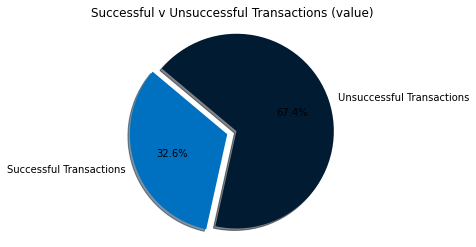

In [74]:
# value of successful transactions vs unsuccessful transactions
value_success_transactions = successful_transactions_table['Transaction Amount'].sum()
print('Value of successful transactions', value_success_transactions)

# value of unsuccessful transactions
value_unsuccess_transactions = unsuccessful_transactions_table['Transaction Amount'].sum()
print('value of unsuccessful transactions', value_unsuccess_transactions)

# pie chart of successful and unsuccessful transactions using matplotlib
labels = ['Successful Transactions', 'Unsuccessful Transactions']
sizes = [value_success_transactions, value_unsuccess_transactions]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Successful v Unsuccessful Transactions (value)')
plt.show()

[]

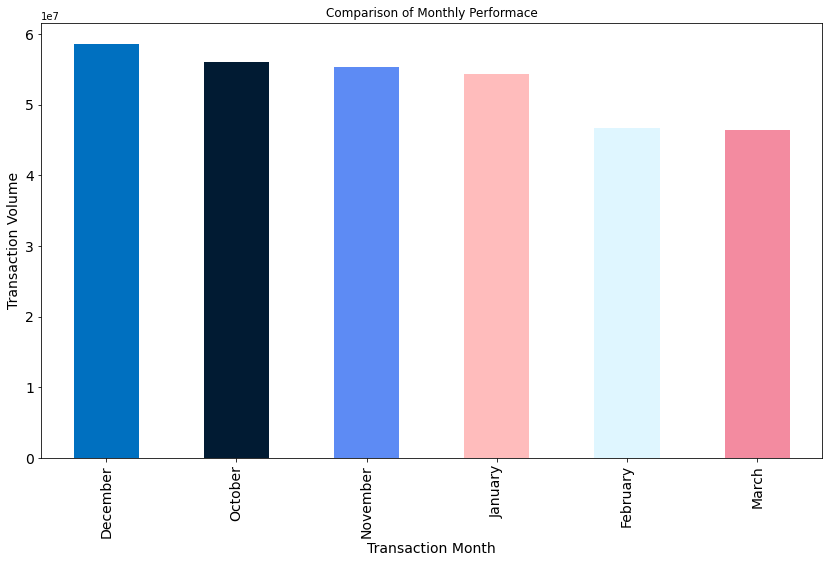

In [83]:
# group revenue by month
months_revenue = successful_transactions_table.groupby(['month_name'], sort=False)['Transaction Amount'].sum()
months_revenue_Plot = months_revenue.sort_values(ascending=False).plot(kind='bar', title='Comparison of Monthly Performace', color=colors, figsize = (14, 8), fontsize=14)
# create csv file
months_revenue.to_csv (r'.\months_revenue.csv')

# months_revenue_Plot = quarterly_revenue_worked.plot(kind='bar' ,title='Identification of Successful and Unsuccessful Transactions', color=colors1, figsize = (14, 8), fontsize=14)
months_revenue_Plot.set_xlabel("Transaction Month", fontsize=14)
months_revenue_Plot.set_ylabel("Transaction Volume", fontsize=14)

months_revenue_Plot.plot(kind='bar', title='Comparison of Monthly Performace', color=colors, figsize = (14, 8), fontsize=14)

# months_revenue = months_revenue
# months_revenue.head(14)
# no apparent significan difference between months

In [146]:
# currency types
currency_types = shopnow.groupby(['Currency'], sort=False)['Transaction Amount'].sum()
currency_types
print('Fishy: Since no other currency types, all transactions were made to Nigeria')

# why are all currencies in naira if multiple countries are involved?

Currency
ngn    972969526.5
Name: Transaction Amount, dtype: float64

<AxesSubplot:title={'center':'Comparison of Currencies'}, xlabel='country_name'>

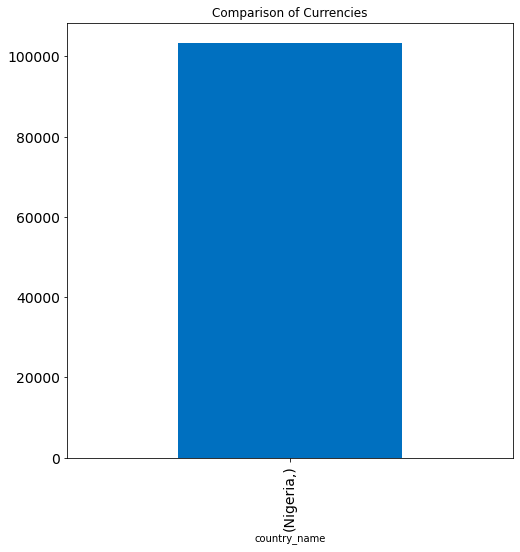

In [89]:
# plot country count
countries = successful_transactions_table.value_counts(['country_name'])
countries
countries.plot(kind='bar', title='Comparison of Currencies', color=colors,  figsize = (8, 8),  fontsize=14)


# collect better data on countries 
# find average amount coming from each country 
# was no transaction succcessful outside Nigeria?


In [105]:
# identify all foreign transactions
foreign_transaction = shopnow[shopnow['country_name'] != 'Nigeria']
foreign_transaction_count_by_country = foreign_transaction.value_counts(['country_name'])
total_foreign_transaction_value = foreign_transaction.groupby(['country_name'], sort=False)['Transaction Amount'].sum()
total_foreign_transaction_value.sum()


532207789.5

Number of transactions uproccessed because from foreign countries: 90
Number of transactions uproccessed because from foreign countries: 307172.0
all successful transactions are from nigeria 
showpnow should seeks expansion of its operations to other countries starting with US, UK, and Canada


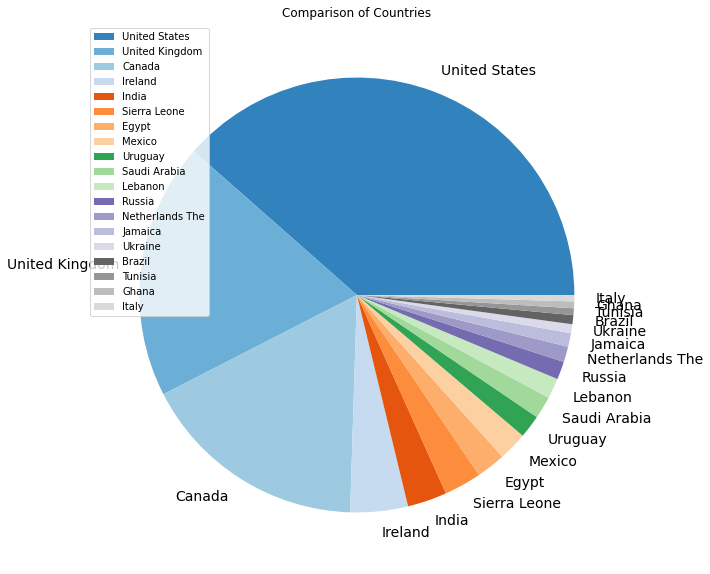

In [101]:
# sum of all foreign transactions and assocaitated transaction value
# unknown is removed from the list
foreign_transaction_noUnknown = foreign_transaction[foreign_transaction['country_name'] != 'unknown']
lost_foreign_transactions = foreign_transaction_noUnknown.value_counts(['country_name']).sum()
lost_foreign_transactions_value = foreign_transaction_noUnknown.groupby(['country_name'], sort=False)['Transaction Amount'].sum()
print('Number of transactions uproccessed because from foreign countries:', lost_foreign_transactions)
print('Number of transactions uproccessed because from foreign countries:', lost_foreign_transactions_value.sum())

implications = 'all successful transactions are from nigeria '
print(implications)

# pie chat showing percentage of foreign transactions attempted
country_Plot = lost_foreign_transactions_value.sort_values(ascending=False).plot(kind='pie', title='Comparison of Countries', cmap= 'tab20c' , figsize = (40, 10), legend=True, fontsize=14)
 
country_Plot.set_xlabel( "", fontsize=14)
country_Plot.set_ylabel("", fontsize=14)

implications = 'showpnow should seeks expansion of its operations to other countries starting with US, UK, and Canada'
print(implications)


        Transaction ID  Transaction Amount  Transaction Time  Status  \
3376          62877099              1550.0  02/10/2021 14:06  failed   
11449         71170378              2050.0  06/10/2021 16:45  failed   
11450         71170726              2050.0  06/10/2021 16:45  failed   
11847         71384324              5050.0  06/10/2021 19:15  failed   
11852         71387003              5050.0  06/10/2021 19:17  failed   
...                ...                 ...               ...     ...   
290537       390755982              1250.0  17/03/2022 06:47  failed   
290538       390756025              1250.0  17/03/2022 06:47  failed   
293399       395251287              2800.0  19/03/2022 06:34  failed   
295679       398839942              2500.0  20/03/2022 19:15  failed   
302002       407477759              3550.0  25/03/2022 05:51  failed   

                 Bank Name Card Network  \
3376    International Bank         visa   
11449   International Bank         visa   
11450 

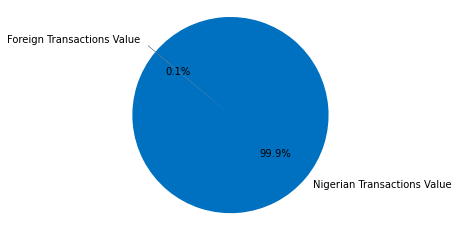

implications Significan business losses from reliance from inability to receive payments from foreign countries


In [129]:
# pie chart showing percentage of nigerian transactions v foreign transactions in value
nigeria_transactions = shopnow[shopnow['country_name'] == 'Nigeria']
nigeria_transactions_value = nigeria_transactions['Transaction Amount'].sum()
foreign_transactions_unknown = shopnow[shopnow['country_name'] != 'Nigeria']
foreign_transactions = foreign_transactions_unknown[foreign_transactions_unknown['country_name'] != 'unknown']
print(foreign_transactions)
# foreign_transaction_value = foreign_transaction_noUnknown['Transaction Amount'].sum()
foreign_transaction_value = foreign_transactions['Transaction Amount'].sum()

print('nigeria_transactions_value', nigeria_transactions_value)
print('foreign_transaction_value', foreign_transaction_value)

labels = ['Nigerian Transactions Value', 'Foreign Transactions Value']
sizes = [nigeria_transactions_value, foreign_transaction_value]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

implications = 'Significan business losses from reliance from inability to receive payments from foreign countries'
print('implications', implications)

implication: Shop Now must find ways to target Canada, UK, and Ireland
implication: The cost of acquiring customers from these countries should be lower because of the high value


Text(0, 0.5, 'Avergae Transaction Value')

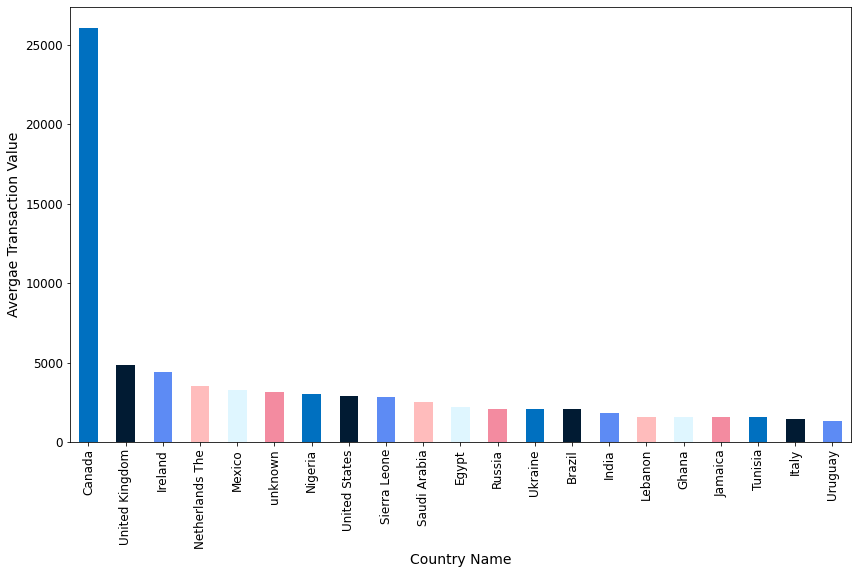

In [144]:
# find average value of transactions attempted from each country
average_transaction_value_from_each_country = shopnow.groupby(['country_name'], sort=False)['Transaction Amount'].mean().sort_values(ascending=False)
average_transaction_value_from_each_country
print('implication: Shop Now must find ways to target Canada, UK, and Ireland')
print('implication: The cost of acquiring customers from these countries should be lower because of the high value')
# creat csv file
average_transaction_value_from_each_country.to_csv (r'.\average_transaction_value_from_each_country.csv')

# plot average transaction value from each country
transaction_by_country_plot = average_transaction_value_from_each_country.plot(kind='bar',  color = colors ,  figsize = (14, 8), fontsize=12)
transaction_by_country_plot.set_xlabel("Country Name", fontsize=14)
transaction_by_country_plot.set_ylabel("Avergae Transaction Value", fontsize=14)

In [149]:
# successful transactions by countries
successful_transactions_table.loc[successful_transactions_table['country_name'] != 'Nigeria']
# all successful transactions are from nigeria 

,Transaction ID,Transaction Amount,Transaction Time,Status,Bank Name,Card Network,Error Response,Payment Channel,Customer ID,Currency,country_name,year,month,month_name,day_name


In [147]:
# cutomer count
# count of customers who attempted transactions
totat_customer_attempt  = shopnow.value_counts(['Customer ID'])
print('Total Customers:', totat_customer_attempt.count())


# successful customers
customer_count  = successful_transactions_table.value_counts(['Customer ID'])
print('Total Successful Customers:', customer_count.count())

# highest frequency customer
customer_count.sort_values(ascending=False).head(1)
# did he make more in q1 or q4
print('Highest Frequency Customer:', customer_count.sort_values(ascending=False).head(1))

highest_grossing_customer = successful_transactions_table.groupby(['Customer ID'], sort=False)['Transaction Amount'].sum()
print('Highest Grossing Customer:', highest_grossing_customer.sort_values(ascending=False).head(1))

Total Customers: 31917
Total Successful Customers: 21756
Highest Frequency Customer: Customer ID
27777013       161
dtype: int64
Highest Grossing Customer: Customer ID
10168525    2100050.0
Name: Transaction Amount, dtype: float64


In [69]:
# most successful payment method
payment_method = successful_transactions_table.value_counts(['Payment Channel'])
payment_method
# print('most successful payment method:', payment_method.sort_values(ascending=False).head(1))


Payment Channel
card               93762
ussd                9355
bank                 122
dtype: int64

In [152]:
# most common unsuccessful payment method
common_unsuccessful = unsuccessful_transactions_table.value_counts(['Payment Channel'])
common_unsuccessful
# print('most unsuccessful payment channel:', payment_method.sort_values(ascending=False).head(1))
# ussd seems reliable ?

Payment Channel
card               208235
ussd                 2546
bank                  398
dtype: int64

In [153]:
# most common unsuccessful bank
common_unsuccessful_bank = unsuccessful_transactions_table.value_counts(['Bank Name'])
common_unsuccessful_bank
# print('most unsuccessful payment channel:', payment_method.sort_values(ascending=False).head(1))
# orange bank had bulk of no succss 

Bank Name         
unknown               168869
Orange Bank            11669
Blue Bank               6739
Bank for All            5259
Green Bank              4883
Red Bank                4360
Zebra Bank              1556
Standing Bank           1196
Steer Bank              1130
Kings Bank              1000
Pole Bank                977
Fidel Bank               806
Unicorn Bank             776
Eko Bank                 757
Amew Bank                592
Key Bank                 244
Brave Bank               164
International Bank        90
Lata Bank                 56
Ocean Bank                36
Granite Bank              10
Bank of the globe          4
dtype: int64

In [231]:
# # bank success
common_successful_bank = successful_transactions_table.value_counts(['Bank Name'])
# rate of failure for each bank
common_successful_bank

Bank Name        
Orange Bank          47533
Green Bank           13487
Blue Bank            11705
Bank for All          9039
Red Bank              8426
Standing Bank         2400
Zebra Bank            2005
Steer Bank            1919
Pole Bank             1521
Eko Bank              1144
Unicorn Bank          1125
Fidel Bank             929
Amew Bank              866
Kings Bank             377
Brave Bank             372
Key Bank               355
Bank of the globe       18
Ocean Bank              13
Granite Bank             5
dtype: int64

In [227]:
# rate of success for each bank
bank_success_rate = shopnow.groupby(['Bank Name', 'Status'], sort=False)['Transaction Amount'].count().sort_values(ascending=False)


# bank_success_rate['Total'] = bank_success_rate.groupby(['Bank Name'], sort=False).sum()

each_bank_total = bank_success_rate.groupby(['Bank Name'], sort=False).sum().sort_values(ascending=False)



# # bank failure
# common_unsuccessful_bank = unsuccessful_transactions_table.value_counts(['Bank Name'])
# # rate of failure for each bank

# plot rate of success for each bank
# bank_success_rate.plot(kind='bar',  color = colors ,  figsize = (14, 8), fontsize=12)

each_bank_total
each_bank_total.to_csv (r'.\each_bank_total.csv')

bank_success_rate
# creatae csv
# bank_success_rate.to_csv (r'.\bank_success_rate.csv')


Bank Name          Status   
unknown            abandoned    168353
Orange Bank        success       47533
Green Bank         success       13487
Blue Bank          success       11705
Orange Bank        failed        10101
                                 ...  
Fidel Bank         reversed          2
Zebra Bank         reversed          2
Bank of the globe  abandoned         2
Ocean Bank         reversed          1
Eko Bank           reversed          1
Name: Transaction Amount, Length: 76, dtype: int64

In [ ]:
common_unsuccessful_card = unsuccessful_transactions_table.value_counts(['Card Network'])
common_unsuccessful_card
# doesnt necessarily mean that card network is bad, rate of failure needs to be calculated

Card Network
unknown         168869
mastercard       26179
verve            10086
visa              5812
Orange Bank        104
Lata Bank           56
offline             32
Red Bank            29
Steer Bank           6
Bank for All         4
Brave Bank           2
dtype: int64

In [233]:
successful_Card = successful_transactions_table.value_counts(['Card Network'])
successful_Card


Card Network
mastercard      67233
visa            13988
verve           12541
offline          9355
Red Bank           67
Orange Bank        24
Brave Bank         23
Steer Bank          5
Bank for All        3
dtype: int64

In [74]:
unsupported_banks =  shopnow[shopnow['Error Response'] == 'Unsupported Bank']
unsupported_banks

,Transaction ID,Transaction Amount,Transaction Time,Status,Bank Name,Card Network,Error Response,Payment Channel,Customer ID,Currency,country_name,year,month,month_name


day_name
Friday       47122536.0
Saturday     44990489.5
Sunday       45969778.5
Monday       45168939.5
Tuesday      44236974.5
Wednesday    43505212.0
Thursday     46601692.5
Name: Transaction Amount, dtype: float64


<AxesSubplot:title={'center':'Comparison of Successful Days of the Week'}, xlabel='day_name'>

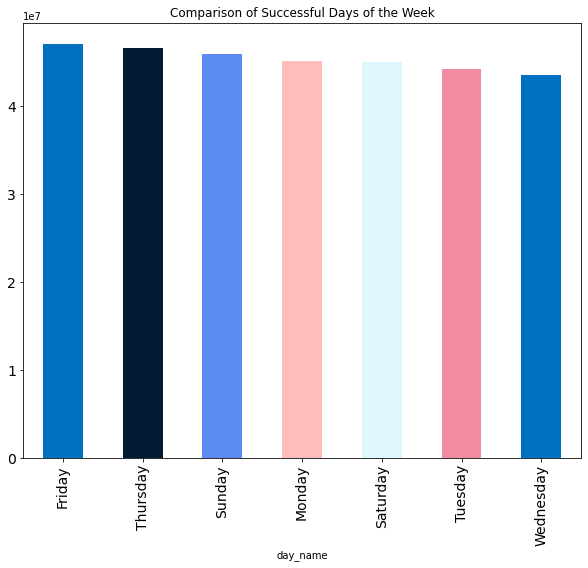

In [154]:
# what days of the week are most successful
success_days = successful_transactions_table.groupby(['day_name'], sort=False)['Transaction Amount'].sum()
# create csv
success_days.to_csv (r'.\success_days.csv')

print(success_days)
success_days.sort_values(ascending=False).plot(kind='bar', title='Comparison of Successful Days of the Week',   color=colors, figsize = (10, 8), legend=False, fontsize=14)

day_name
Friday       94950448.0
Saturday     89675169.0
Sunday       88090539.5
Monday       95868984.0
Tuesday      93206448.0
Wednesday    94536214.0
Thursday     99046101.5
Name: Transaction Amount, dtype: float64
implication: Identify why Thursday and Fridays are generally the most successful days and leverage this to increase the number of transactions


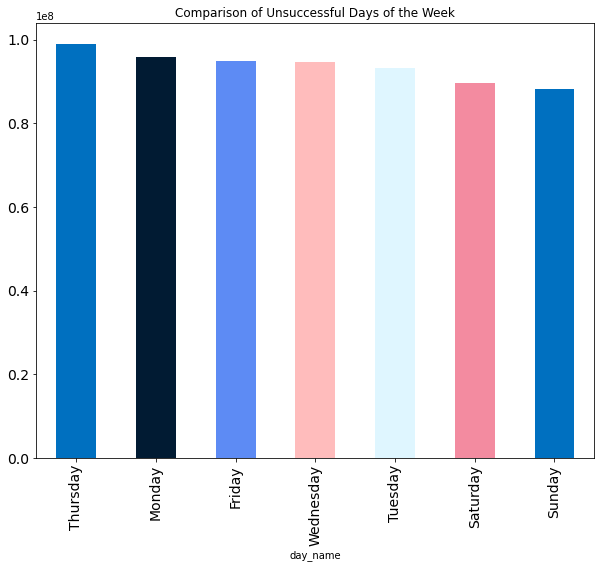

In [155]:
# what days of the week are most unsuccessful
unsuccess_days = unsuccessful_transactions_table.groupby(['day_name'], sort=False)['Transaction Amount'].sum()
# create csv
unsuccess_days.to_csv (r'.\unsuccess_days.csv')

print(unsuccess_days)
# sort by value
unsuccess_days.sort_values(ascending=False).plot(kind='bar', title='Comparison of Unsuccessful Days of the Week', color=colors, figsize = (10, 8), legend=False, fontsize=14)
print('implication: Identify why Thursday and Fridays are generally the most successful days and leverage this to increase the number of transactions')

Status   
success      103239
failed        30220
abandoned     11707
reversed        287
dtype: int64


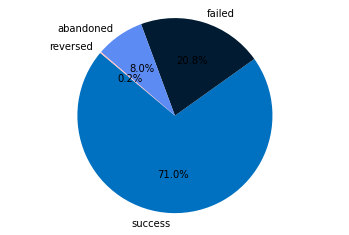

In [171]:
# count of unsuccessful transactions in Nigeria
count_unsuccess_transactions_nigeria = nigeria_transactions.value_counts(['Status'])
count_unsuccess_transactions_nigeria
# plot count of unsuccessful transactions in Nigeria
# count_unsuccess_transactions_nigeria.plot(kind='pie', title='Comparison of  Transactions in Nigeria',  cmap= 'tab20c',  figsize = (14, 8),  fontsize=14)
print(count_unsuccess_transactions_nigeria)

explode = (0.1, 0)
labels = ['success', 'failed', 'abandoned', 'reversed']
sizes = [value_success_transactions, value_unsuccess_transactions]
plt.pie(count_unsuccess_transactions_nigeria, labels=labels,  colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()

# which cards or banks have most transactions reversed

Total with duplicatesShopNow Customers 314418
ShopNow Unique customers 31917
Q4 Unique customers 23525
Q1 Unique customers 22748
Churned or Retained True     14356
False     9169
Name: Customer ID, dtype: int64
Q4 Retained Customers 14356
New Customers in Q1: 8392
Churn Rate: 38.98 %
New Customers in Q1: True     14356
False     8392
Name: Customer ID, dtype: int64


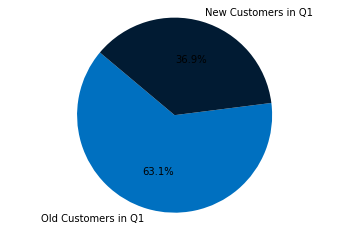

In [182]:
# calculate churn rate for 2021 Q4
print('Total with duplicatesShopNow Customers', shopnow['Customer ID'].count())

shopNowUniqueCustomers = shopnow.drop_duplicates(subset=['Customer ID'], keep='first')
print('ShopNow Unique customers', shopNowUniqueCustomers['Customer ID'].count())

shopNowQ4 = shopnow[shopnow['year'] == 2021]
# print('No of unique users in Q4:', shopNowQ4['Customer ID'].nunique())
shopNowQ4Unique = shopNowQ4.drop_duplicates(subset=['Customer ID'], keep='first')
print('Q4 Unique customers', shopNowQ4Unique['Customer ID'].count())

shopNowQ1 = shopnow[shopnow['year'] == 2022]
shopNowQ1Unique = shopNowQ1.drop_duplicates(subset=['Customer ID'], keep='first')
print('Q1 Unique customers', shopNowQ1Unique['Customer ID'].count())

churnedOrRetained = shopNowQ4Unique['Customer ID'].isin(shopNowQ1Unique['Customer ID'])
print('Churned or Retained', churnedOrRetained.value_counts())
churnedOrRetained = churnedOrRetained.value_counts()

retainedQ4 = churnedOrRetained.iloc[0]
print('Q4 Retained Customers', retainedQ4)

newCustomersQ1table = shopNowQ1Unique['Customer ID'].isin(shopNowQ4Unique['Customer ID'])
newCustomersQ1 = newCustomersQ1table.value_counts().iloc[1]
print('New Customers in Q1:', newCustomersQ1)


# churn rate calculation
churnRate = ((shopNowQ4Unique['Customer ID'].count() - retainedQ4) / shopNowQ4Unique['Customer ID'].count()) * 100
# round to 2 decimal places
churnRate = round(churnRate, 2)
print('Churn Rate:', churnRate, '%')


# explode = (0.1, 0)
# labels = [ 'Q4 Customers not in Q1','Q4 Customers in Q1',]
# plt.pie(churnedOrRetained, labels=labels,  colors=colors, autopct='%1.1f%%', startangle=140)

# plt.axis('equal')
# plt.show()

newCustomersQ1value = newCustomersQ1table.value_counts()
print('New Customers in Q1:', newCustomersQ1value)

explode = (0.1, 0)
labels = [ 'Old Customers in Q1', 'New Customers in Q1']
plt.pie(newCustomersQ1value, labels=labels,  colors=colors, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()
